In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mesh = Make1DMesh(40, mapping=None, periodic=False)
# uniform distributed load
q = 0.4
# Draw(mesh)

In [3]:
w = H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = w*sigma*mu
print ("ndof =", fesm.ndof)

ndof = 83


In [4]:
w, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

In [5]:
a = BilinearForm(fesm)
a += (grad(sigma)*grad(v) + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda )*dx
f = LinearForm(fesm)
f += -q*v*dx
    
gfsol = GridFunction(fesm)
    
a.Assemble()
f.Assemble()
gfsol.vec.data = a.mat.Inverse(fesm.FreeDofs(),inverse="umfpack")*f.vec
gfw, gfsigma, gfmu = gfsol.components

In [6]:
print(gfw.vec)

       0
 9.90234e-06
 3.76042e-05
 8.02148e-05
 0.000135
 0.000199382
 0.000270938
 0.000347402
 0.000426667
 0.000506777
 0.000585938
 0.000662507
 0.000735
 0.00080209
 0.000862604
 0.000915527
 0.00096
 0.000995319
 0.00102094
 0.00103646
 0.00104167
 0.00103646
 0.00102094
 0.000995319
 0.00096
 0.000915527
 0.000862604
 0.00080209
 0.000735
 0.000662507
 0.000585938
 0.000506777
 0.000426667
 0.000347402
 0.000270938
 0.000199382
 0.000135
 8.02148e-05
 3.76042e-05
 9.90234e-06
       0




Text(0, 0.5, 'Deflection(w)')

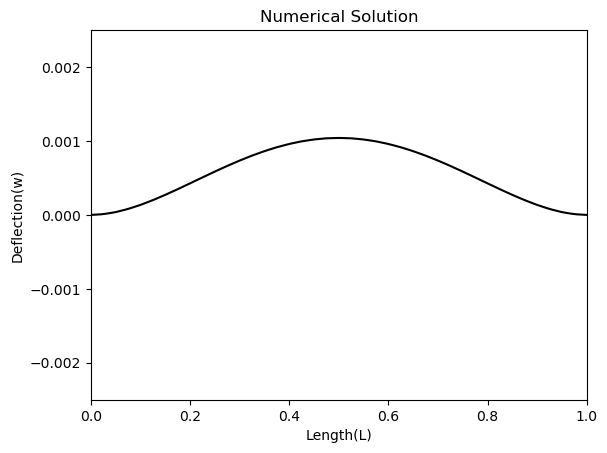

In [7]:
x=np.linspace(0,1,100)

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
plt.title("Numerical Solution")
plt.xlabel("Length(L)")
plt.ylabel("Deflection(w)")